In [1]:
from PIL import ImageGrab
from fractions import Fraction
from IPython.display import display, Image
def ins(ratio=1.0):
 im_data = ImageGrab.grabclipboard()
 new_size = tuple([int(i*ratio) for i in im_data.size])
 thumb = im_data.resize(new_size)
 fn = "temp.PNG"
 thumb.save(fn)
 img = Image(filename=fn)
 display(img)
import random
import more_itertools as mit
import itertools as it
import numpy as np
from functools import lru_cache
##############
from scipy.stats import * # Основная библиотека в этом семестре
############################
import sympy as sp
from scipy.special import *
import math
from scipy.integrate import quad
############################
from tqdm.notebook import tqdm
# Настройка графика
import matplotlib.pyplot as plt # Основная библиотека
import matplotlib.ticker as ticker
from matplotlib import rcParams
#########################
import locale
locale.setlocale(locale.LC_NUMERIC, 'russian')
plt.rcParams['axes.formatter.use_locale'] = True
#########
#########
plt.rcParams['font.size'] = 36
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
###################
def plot_geom(condition,N=15000,reverse=0):
    rcParams['figure.figsize'] = (5, 5)
    rcParams['figure.dpi'] = 200
    fig,ax =plt.subplots(figsize=(5, 5))
    plt.tick_params(labelsize = 16)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.xlim(0,1)
    plt.ylim(0,1)
    ax.set_aspect('equal', adjustable='box')
    U1=uniform() # создаем равномерное (непрерывное) распределение на отрезке [0;1]
    U2=uniform()
    count=0
    for i in tqdm(range(N)):
        x = U1.rvs(size=1)[0]
        y = U2.rvs(size=1)[0]
        if reverse and y>=x:
            y=1-y
            x=1-x
        if condition(x,y): 
            plt.plot(x,y,marker='.', markersize=1,color ='r')
            count+=1
        else:
            plt.plot(x,y,marker='.', markersize=1,color ='gray')
    pstat = count/N
    print(pstat)
    return plt.show()
def plot_stat(condition,N=1000000):
    count=0
    x=[]
    y=[]
    for i in tqdm(range(N)):
        x.append(i+1)
        x1 = random.uniform(0,1)
        y1 = random.uniform(0,1)
        if condition(x1,y1):
            count+=1
        y.append(count/(i+1))
    pstat=count/N
    pstat
    rcParams['figure.figsize'] = (15, 10)
    rcParams['figure.dpi'] = 300
    fig,ax =plt.subplots(figsize=(30, 10))
    plt.tick_params(labelsize = 36)

    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(15))
    ax.xaxis.set_minor_locator(ticker.MaxNLocator(8))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
    ax.yaxis.set_minor_locator(ticker.MaxNLocator(8))
    plt.ylim(pstat-0.005,pstat+0.005)
    plt.xlim(0.1,N)

    plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
    plt.plot(x,y,color='b',lw=3)
    plt.plot(x,[pstat]*len(x),color='r',lw=2)
    plt.show()
    print(pstat)
def make_plot(countr, x, y, N = 10**6):
    pstat = countr/N
    rcParams['figure.figsize'] = (15, 10)
    rcParams['figure.dpi'] = 300
    fig,ax =plt.subplots(figsize=(30, 10))
    plt.tick_params(labelsize = 36)
    plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(15))
    ax.xaxis.set_minor_locator(ticker.MaxNLocator(8))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
    ax.yaxis.set_minor_locator(ticker.MaxNLocator(8))
    plt.ylim(pstat-0.005,pstat+0.005)
    plt.xlim(0,N)
    plt.plot(x,y,color='b',lw=3)
    plt.plot(x,[pstat]*len(x),color='r',lw=2)
    plt.show()

# 4.6

In [15]:
carriege = '1234'

Omega = [''.join(omega) for omega in list(it.product(carriege, repeat=6))]
A = [omega for omega in Omega if omega==omega[0]*6]
B = [omega for omega in Omega if len(set(omega))<4]
AB = [omega for omega in Omega if omega==omega[0]*6 and len(set(omega))<4]

P_A = len(A)/len(Omega)
P_B = len(B)/len(Omega)
P_AB = len(AB)/len(Omega)
P_A_B = P_AB / P_B

P_A_B

0.0015772870662460567

In [16]:
N = 10000000
count_a = count_b = 0
x = []
y = []

for i in tqdm(range(1, N+1)):
    x.append(i)

    omega = ''.join(np.random.choice(['1', '2', '3', '4'], 6, replace=True))

    if len(set(omega))<4:
        count_b += 1
        if omega==omega[0]*6:
            count_a +=1

    y.append(count_a/count_b if count_b else 0)

count_a/count_b

  0%|          | 0/10000000 [00:00<?, ?it/s]

0.0015584238551100281

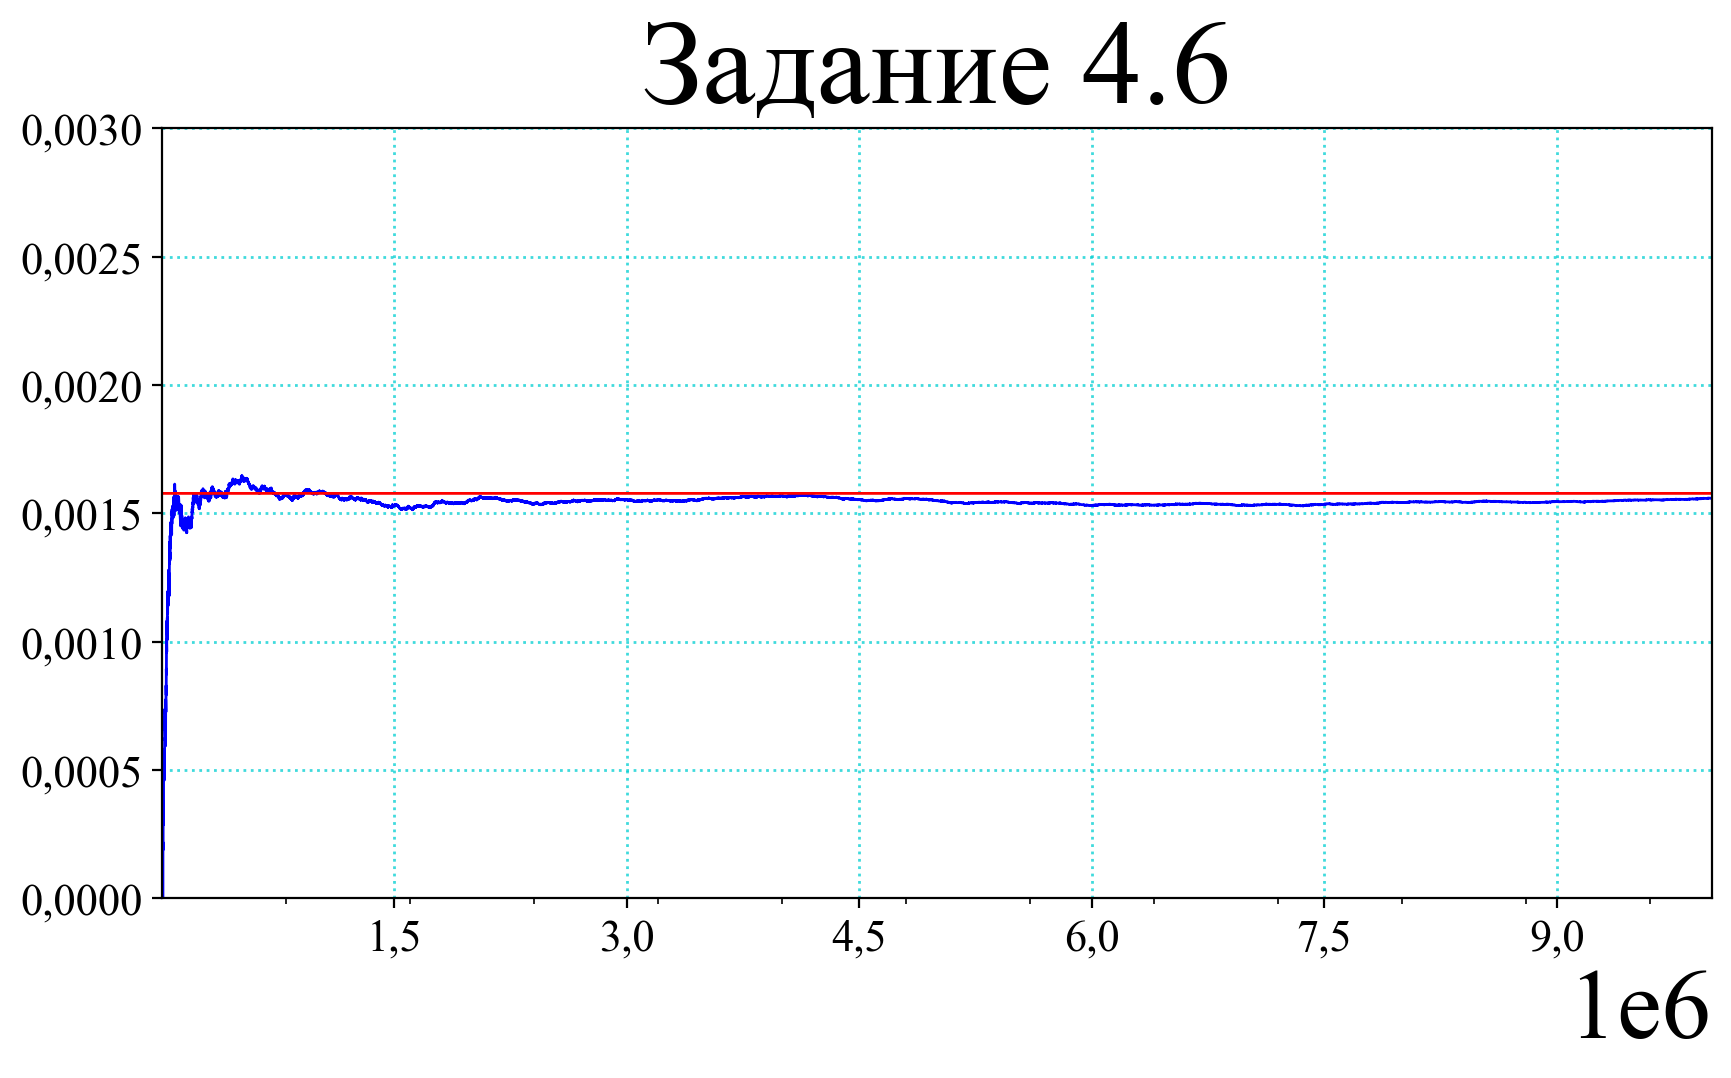

In [17]:
rcParams['figure.figsize'] = (15, 5)
rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(10, 5))
plt.tick_params(labelsize=16)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(15))
plt.ylim(0, 0.003)
plt.xlim(100, N)
################################################################################################
plt.plot(x, y, color='b', lw=1)
plt.plot(x, [P_A_B]*N, color='r', lw=1)
plt.title('Задание 4.6')
plt.show()

# 4.7

In [18]:
def compar(string_1, string_2):
    counter = 0
    for i in range(len(string_1)):
        if string_1[i] == string_2[i]:
            counter += 1
    return (True, counter) if counter else (False, counter)

  0%|          | 0/1000000 [00:00<?, ?it/s]

0.632791


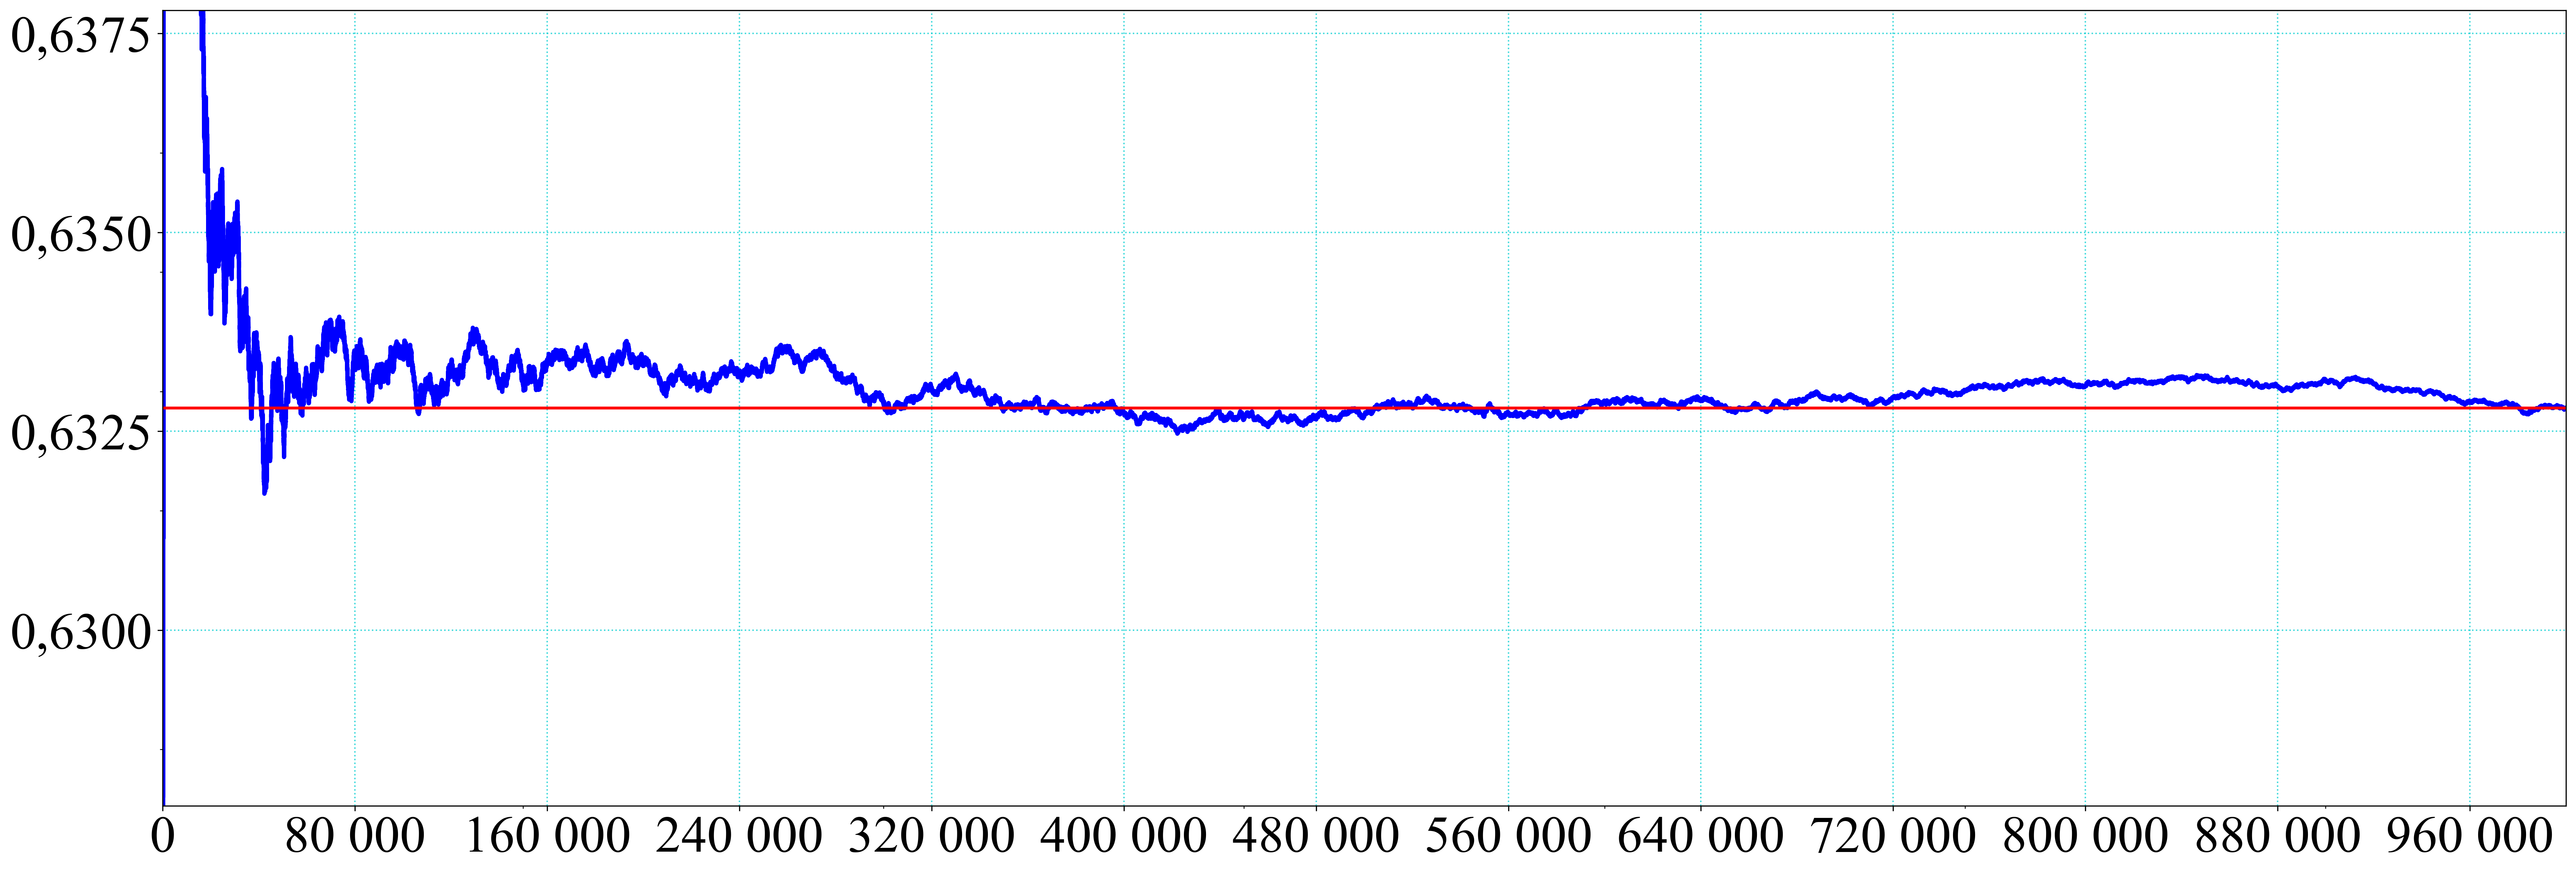

In [19]:
#a
letters = [str(i) for i in range(1, 9)] 

count = 0
N = 1_000_000
x = []
y = []
for i in tqdm(range(1, N + 1)):
    x.append(i)
    lets = ''.join(np.random.choice(letters, 8, replace=False))
    addresses = ''.join(np.random.choice(letters, 8, replace=False))
    if compar(lets, addresses)[0]:
        count += 1
    y.append(count / i)
print(y[-1])
make_plot(count,x,y,N)

  0%|          | 0/1000000 [00:00<?, ?it/s]

0.061389


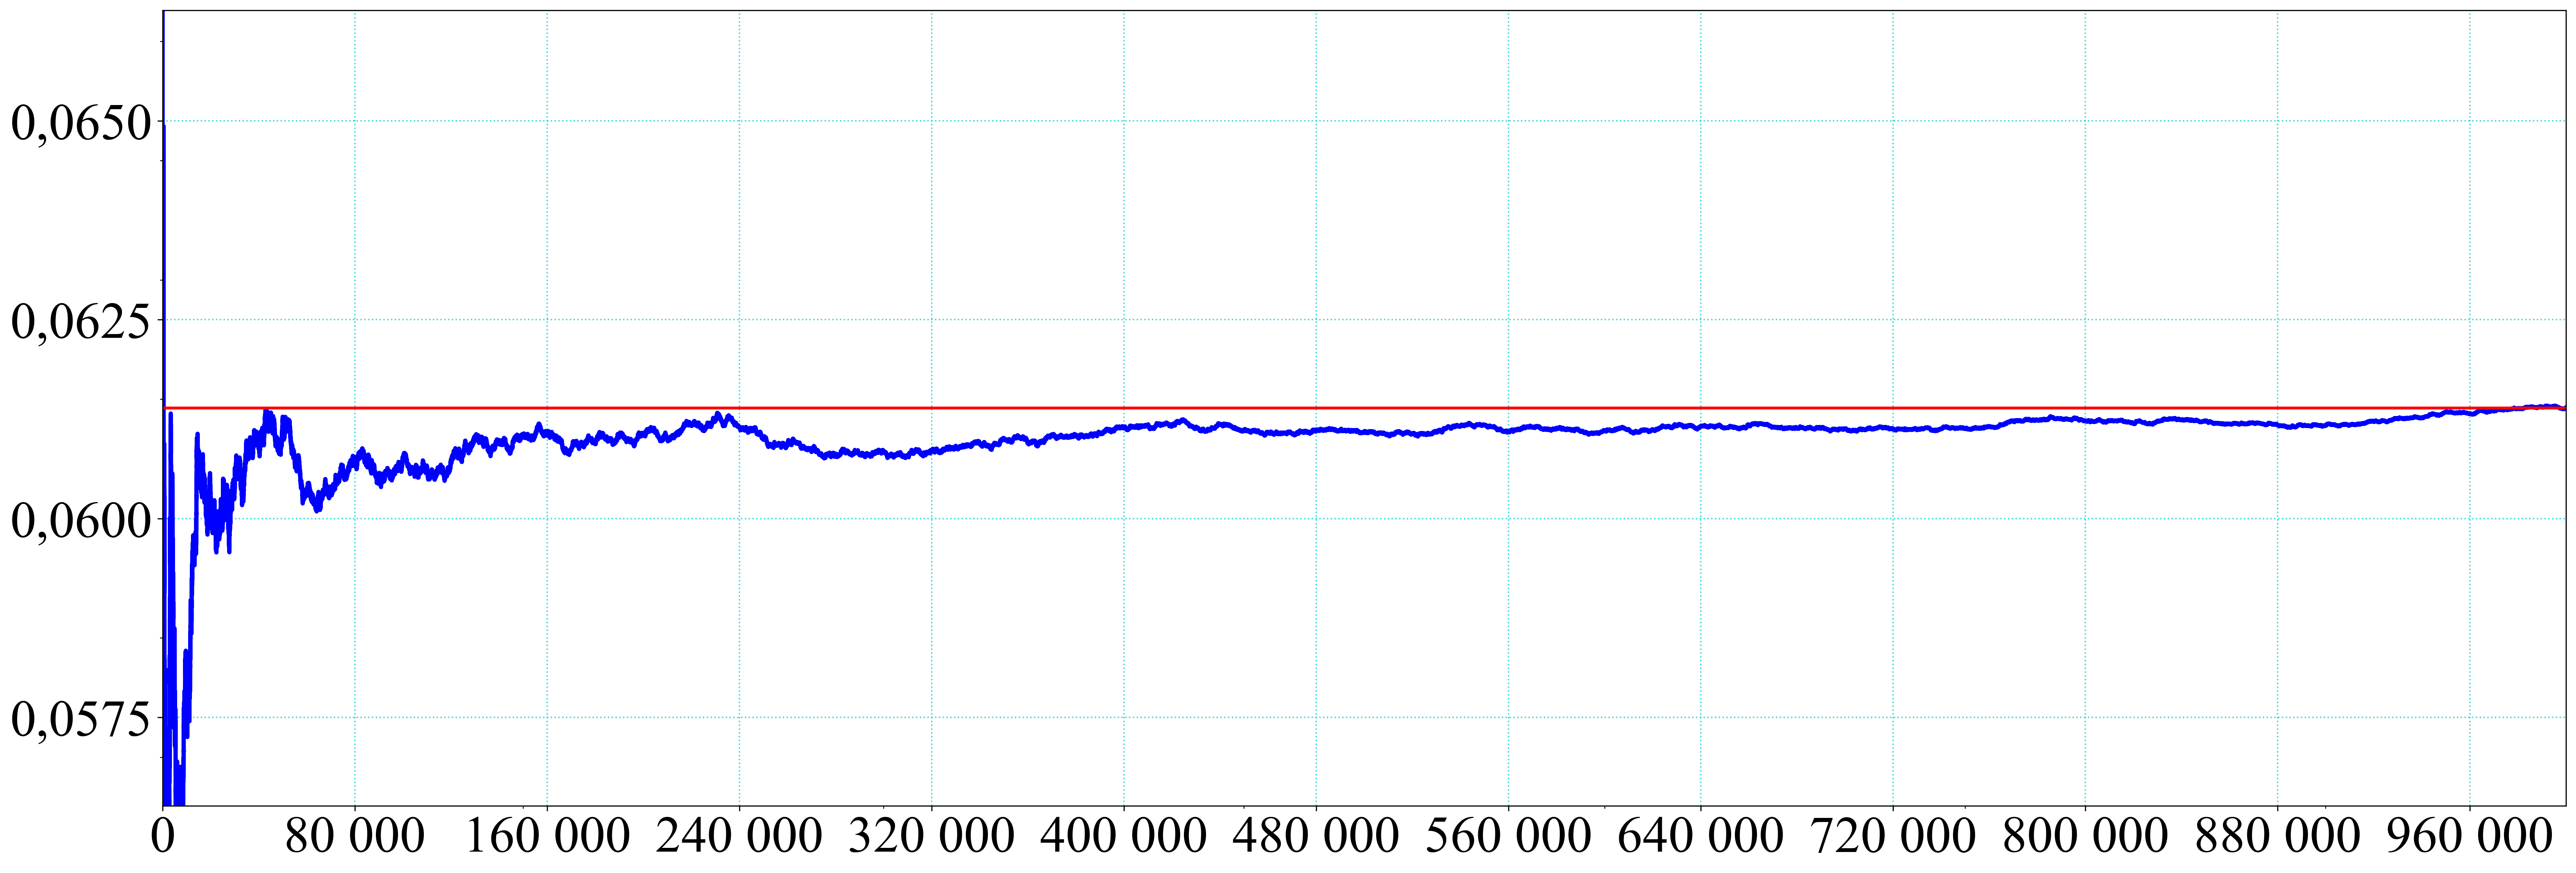

In [8]:
# b
count = 0
N = 1_000_000
x = []
y = []
for i in tqdm(range(1, N + 1)):
    x.append(i)
    lets = ''.join(np.random.choice(letters, 8, replace=False))
    addresses = ''.join(np.random.choice(letters, 8, replace=False))
    if compar(lets, addresses) == (True, 3):
        count += 1
    y.append(count / i)
print(y[-1])
make_plot(count,x,y,N)

# 4.8

In [9]:
def members(m):
    members = []
    numbers = list(it.permutations([i for i in range(len(m))]))
    for perm in tqdm(numbers):
        member = 1
        for i in range(len(perm)):
            member *= m[i][perm[i]]
        members.append(member)
    return members


def makenulleye(n):
    matrix = np.ones((n, n), dtype='int_') - np.eye((n), dtype='int_')
    return matrix

def find_fract(n,fract=1):
    memb = members(makenulleye(n))
    F = Fraction(memb.count(1), len(memb))
    return print(F) if fract==1 else memb.count(1)/len(memb)

In [10]:
find_fract(10)

  0%|          | 0/3628800 [00:00<?, ?it/s]

16481/44800


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/720 [00:00<?, ?it/s]

  0%|          | 0/5040 [00:00<?, ?it/s]

  0%|          | 0/40320 [00:00<?, ?it/s]

  0%|          | 0/362880 [00:00<?, ?it/s]

  0%|          | 0/3628800 [00:00<?, ?it/s]

  0%|          | 0/39916800 [00:00<?, ?it/s]

0.3678794392336059


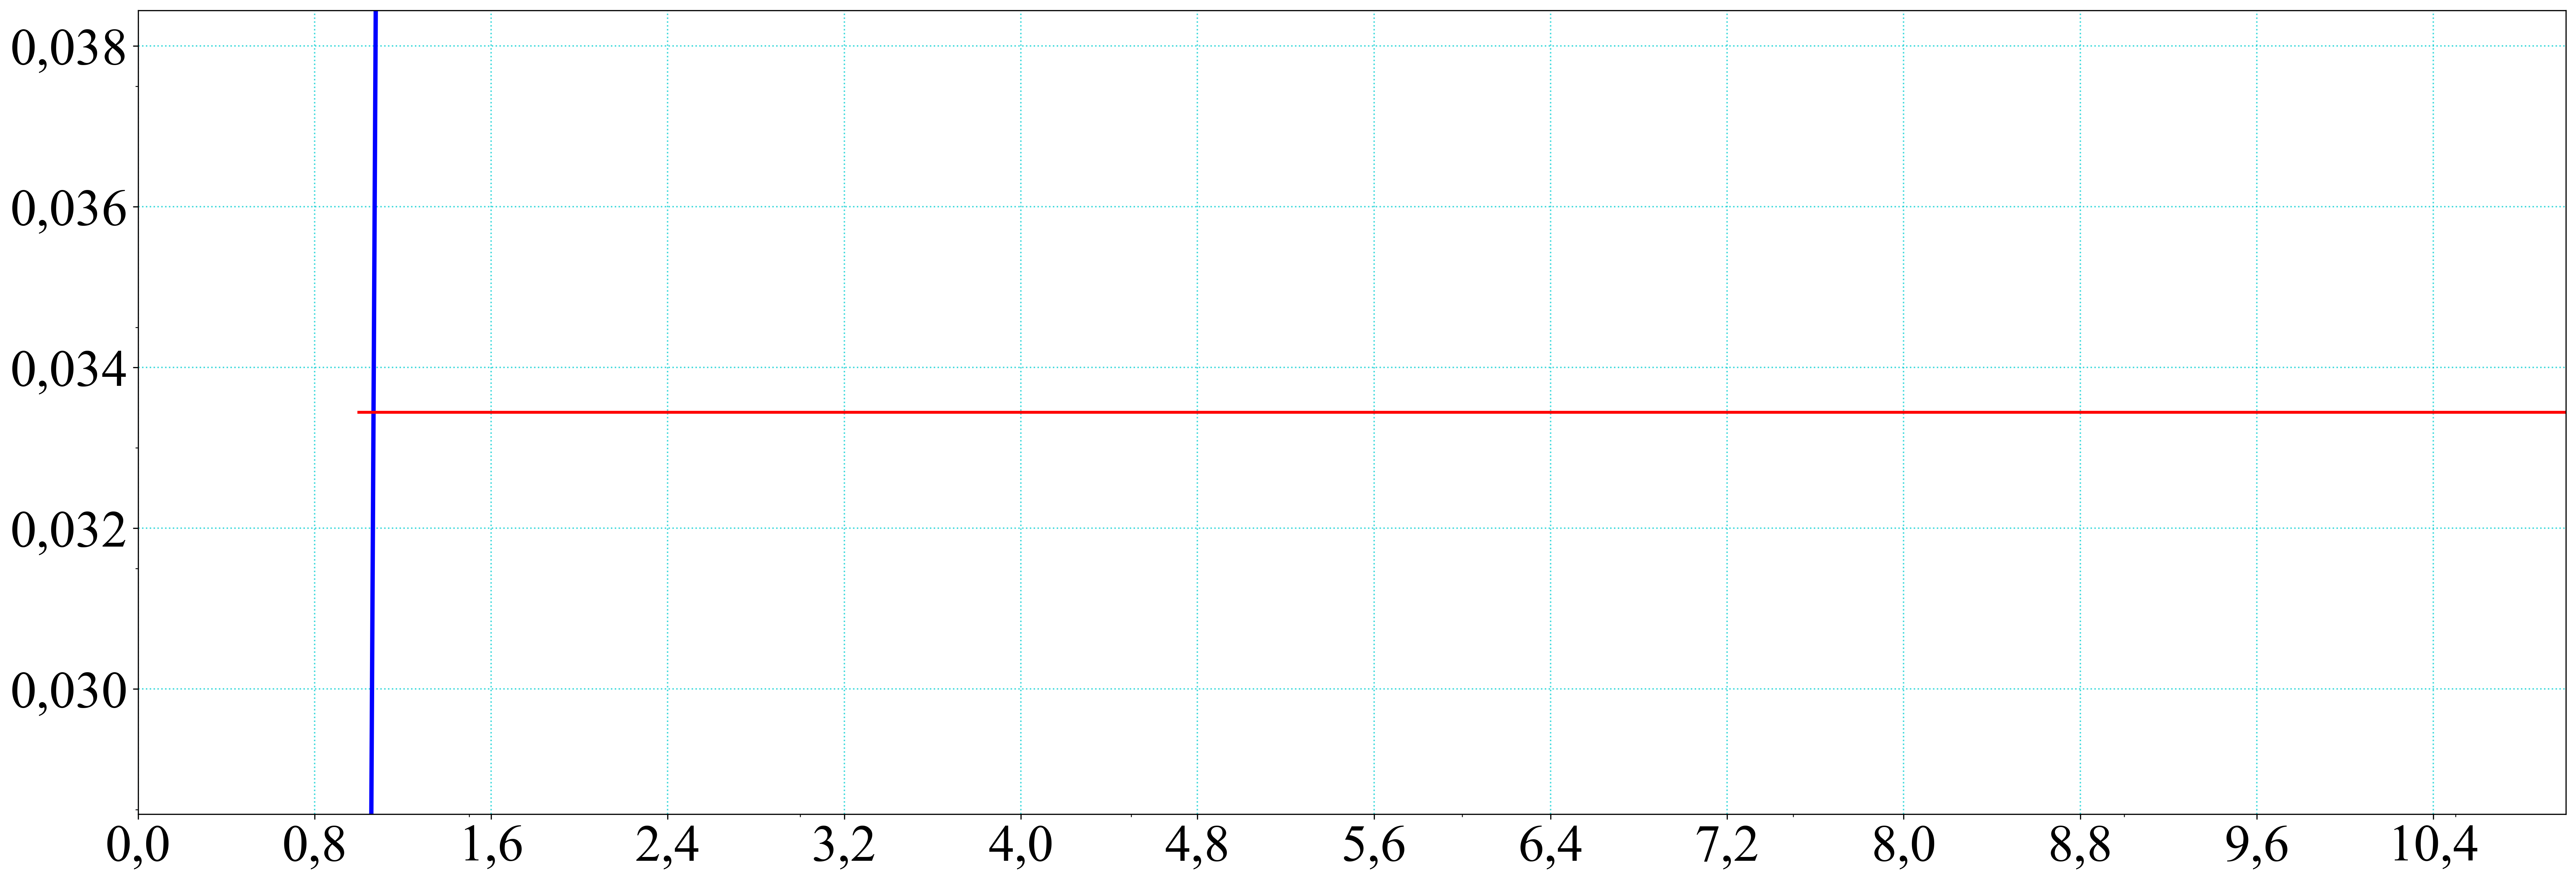

In [11]:
N=11
x = []
y = []
for i in tqdm(range(1, N + 1)):
    x.append(i)
    y.append(find_fract(i,0))
print(y[-1])
make_plot(y[-1],x,y,N)

# 4.9

![image.png](attachment:image.png)

In [2]:
cond1 = lambda x,y,r: abs(x-y)>=r
cond2 = lambda x,y,r: x+y<=3*r

  0%|          | 0/10000 [00:00<?, ?it/s]

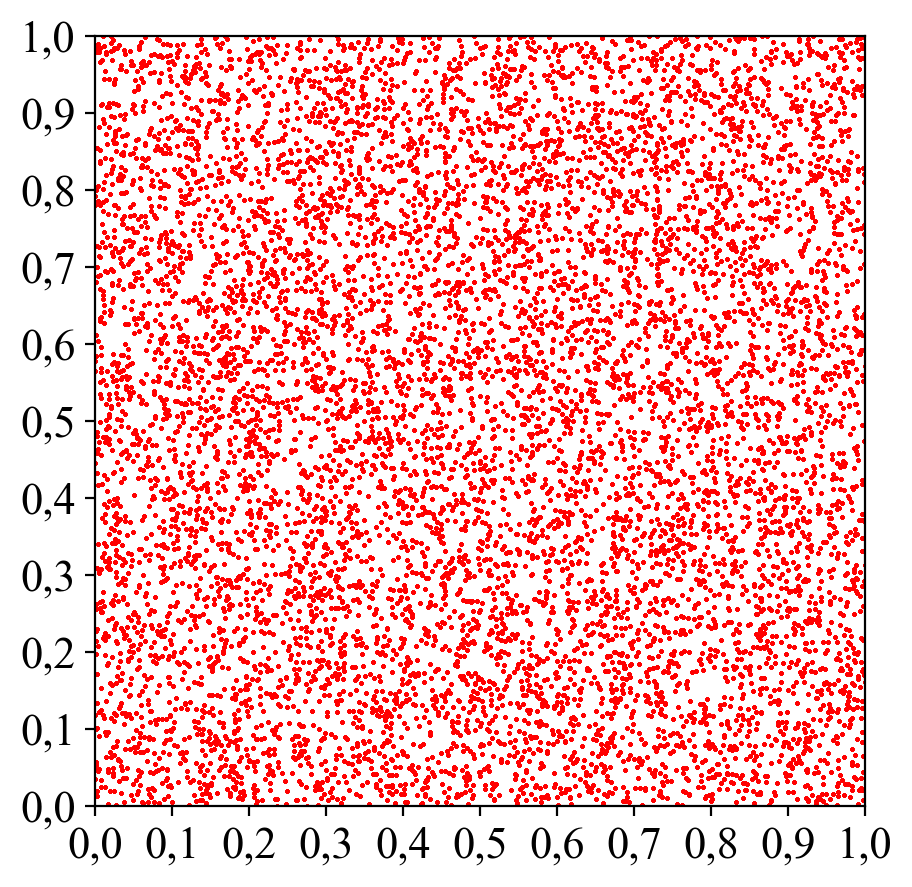

0.0


  0%|          | 0/10000 [00:00<?, ?it/s]

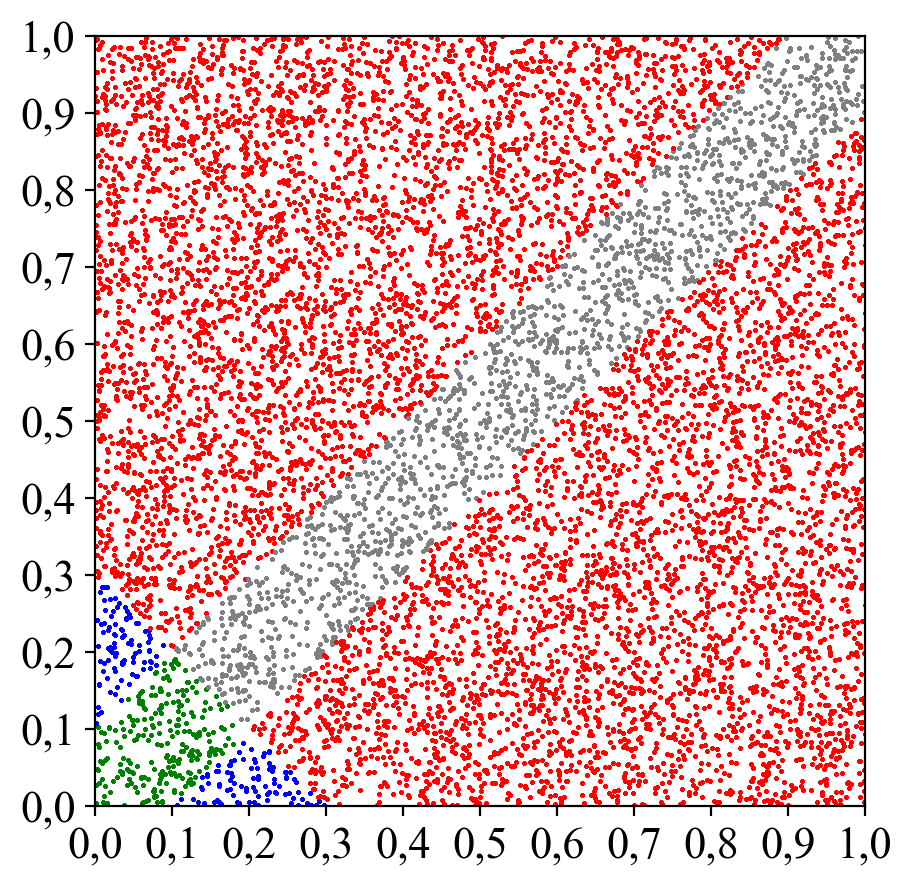

0.1


In [13]:
N=10_000
rs=[i for i in range(15)]
for i in range(2):
    r = 0.1*rs[i]
    rcParams['figure.figsize'] = (5, 5)
    rcParams['figure.dpi'] = 200
    fig,ax =plt.subplots(figsize=(5, 5))
    plt.tick_params(labelsize = 16)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.xlim(0,1)
    plt.ylim(0,1)
    ax.set_aspect('equal', adjustable='box')
    
    for i in tqdm(range(N)):
        x=random.uniform(1,0)
        y=random.uniform(1,0)
        for _ in range(10):
            flag=0
            if cond1(x,y,r) and cond2(x,y,r):
                plt.plot(x,y,marker='.', markersize=1,color ='blue')
            else:
                if cond1(x,y,r): 
                    plt.plot(x,y,marker='.', markersize=1,color ='r')
                elif cond2(x,y,r):
                    plt.plot(x,y,marker='.', markersize=1,color ='green')
                else:
                    plt.plot(x,y,marker='.', markersize=1,color ='gray')
    plt.show()
    print(r)

  0%|          | 0/10000 [00:00<?, ?it/s]

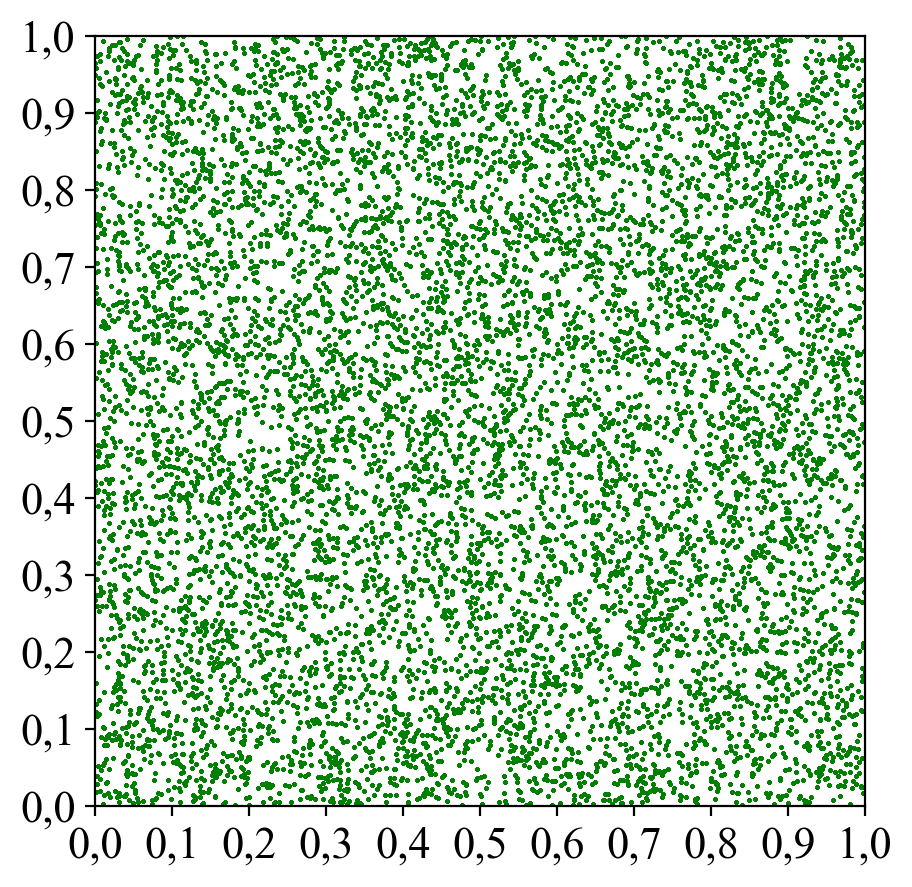

1.6666666666666667


In [3]:
o=1
N=10_000
if o ==1:
    r = 5/3
    rcParams['figure.figsize'] = (5, 5)
    rcParams['figure.dpi'] = 200
    fig,ax =plt.subplots(figsize=(5, 5))
    plt.tick_params(labelsize = 16)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.xlim(0,1)
    plt.ylim(0,1)
    ax.set_aspect('equal', adjustable='box')
    
    for i in tqdm(range(N)):
        x=random.uniform(1,0)
        y=random.uniform(1,0)
        for _ in range(10):
            flag=0
            if cond1(x,y,r) and cond2(x,y,r):
                plt.plot(x,y,marker='.', markersize=1,color ='blue')
            else:
                if cond1(x,y,r): 
                    plt.plot(x,y,marker='.', markersize=1,color ='r')
                elif cond2(x,y,r):
                    plt.plot(x,y,marker='.', markersize=1,color ='green')
                else:
                    plt.plot(x,y,marker='.', markersize=1,color ='gray')
    plt.show()
    print(r)

  0%|          | 0/10000 [00:00<?, ?it/s]

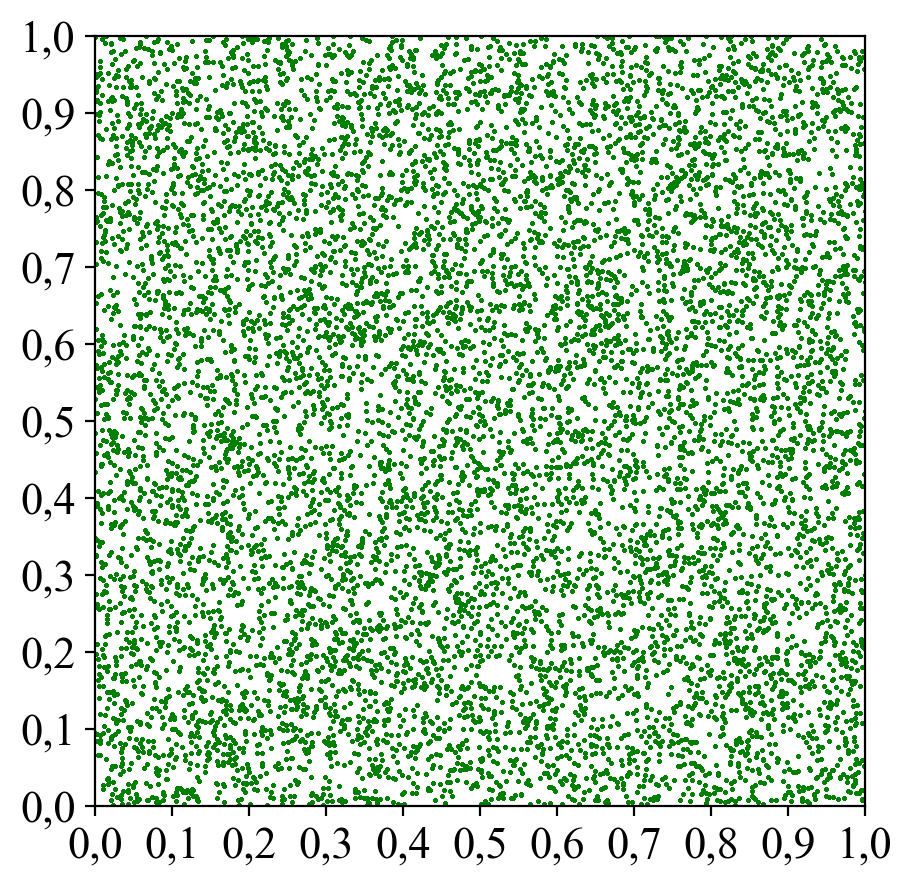

1


In [4]:
o=1
N=10_000
if o ==1:
    r = 1
    rcParams['figure.figsize'] = (5, 5)
    rcParams['figure.dpi'] = 200
    fig,ax =plt.subplots(figsize=(5, 5))
    plt.tick_params(labelsize = 16)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.xlim(0,1)
    plt.ylim(0,1)
    ax.set_aspect('equal', adjustable='box')
    
    for i in tqdm(range(N)):
        x=random.uniform(1,0)
        y=random.uniform(1,0)
        for _ in range(10):
            flag=0
            if cond1(x,y,r) and cond2(x,y,r):
                plt.plot(x,y,marker='.', markersize=1,color ='blue')
            else:
                if cond1(x,y,r): 
                    plt.plot(x,y,marker='.', markersize=1,color ='r')
                elif cond2(x,y,r):
                    plt.plot(x,y,marker='.', markersize=1,color ='green')
                else:
                    plt.plot(x,y,marker='.', markersize=1,color ='gray')
    plt.show()
    print(r)

  0%|          | 0/10000 [00:00<?, ?it/s]

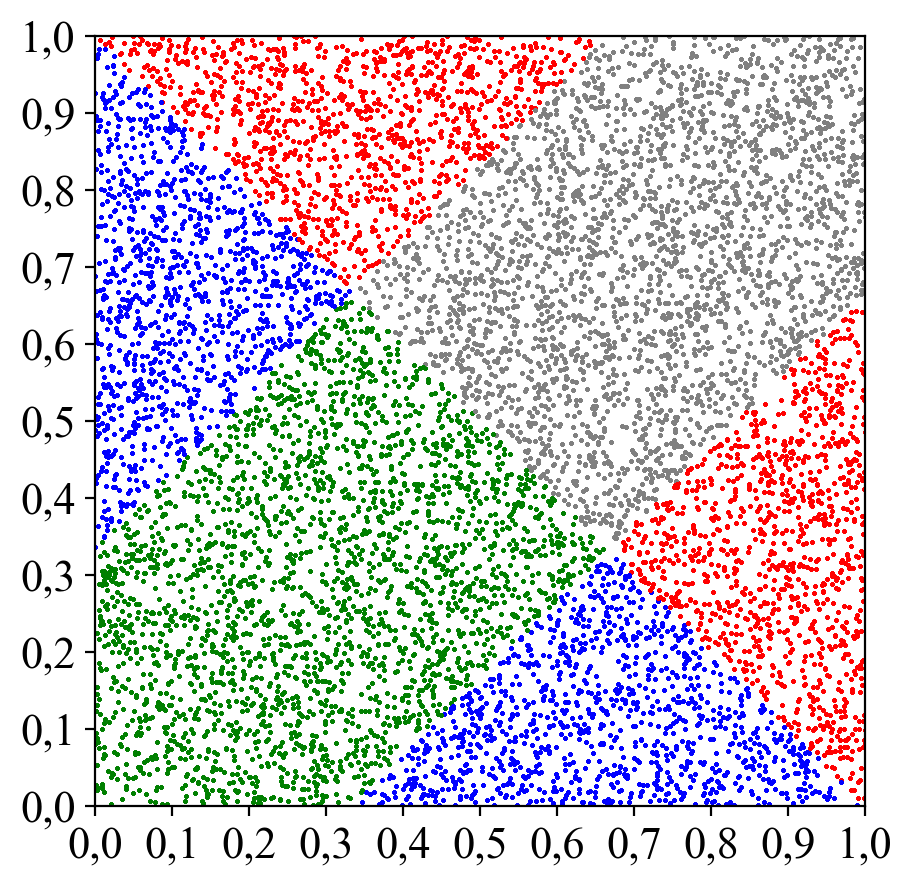

0.3333333333333333


In [5]:
o=1
N=10_000
if o ==1:
    r = 1/3
    rcParams['figure.figsize'] = (5, 5)
    rcParams['figure.dpi'] = 200
    fig,ax =plt.subplots(figsize=(5, 5))
    plt.tick_params(labelsize = 16)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    plt.xlim(0,1)
    plt.ylim(0,1)
    ax.set_aspect('equal', adjustable='box')
    
    for i in tqdm(range(N)):
        x=random.uniform(1,0)
        y=random.uniform(1,0)
        for _ in range(10):
            flag=0
            if cond1(x,y,r) and cond2(x,y,r):
                plt.plot(x,y,marker='.', markersize=1,color ='blue')
            else:
                if cond1(x,y,r): 
                    plt.plot(x,y,marker='.', markersize=1,color ='r')
                elif cond2(x,y,r):
                    plt.plot(x,y,marker='.', markersize=1,color ='green')
                else:
                    plt.plot(x,y,marker='.', markersize=1,color ='gray')
    plt.show()
    print(r)

Используя полученные геометрические вероятносные пространства для $r = 0$ и $r = 0,1$, проведем ряд рассуждений:
<br> $\mu(\Omega) = 1$
<br> $\mu(A) = (1-r)^2$
<br> $\Rho(A) = \frac{\mu(A)}{\mu(\Omega)} = \frac{(1-r)^2}{1} =  (1-r)^2$
<br> $\mu(B) = \frac{1}{2}*(3r)^2$
<br> $\Rho(B) = \frac{\mu(B)}{\mu(\Omega)} = \frac{\frac{1}{2}*(3r)^2}{1} = \frac{9}{2}r^2 $ 
<br> $A\cap B = \{ (x,y) \in \Omega: |x-y|\ge r, x+y\le 3r \} $
<br> $\mu(A\cap B) = 2 * \frac{1}{4} * (2r)^2 = 2r^2$
<br> $\Rho(A\cap B) = \frac{\mu(A\cap B)}{\mu(\Omega)} = \frac{2r^2}{1} = 2r^2$
<br> По свойству независимых событий $\Rho(A\cap B) = \Rho(A) * \Rho(B)$
<br> Подставим в формулу полученные значения, выраженные через $r$
<br> $2r^2 = \frac{9}{2}r^2 * (1-r)^2$
<br> $r_1 = \frac{1}{3}, r_2 = \frac{5}{3}$